# LOAN DEFAULT PREDICTION

## 1.EDA & Feature Engineering

### Loading libraries

In [2]:
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import pandas_profiling
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline
sns.set_style("whitegrid")

### Loading Dataset

In [20]:
train_df = pd.read_csv(r"train.csv")
train_df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [21]:
data_dictionary=pd.read_csv('./Data Dictionary.csv')
data_dictionary

,Variable Name,Description,Unnamed: 2
0,UniqueID,Identifier for customers,NaN
1,loan_default,Payment default in the first EMI on due date,NaN
2,disbursed_amount,Amount of Loan disbursed,NaN
3,asset_cost,Cost of the Asset,NaN
4,ltv,Loan to Value of the asset,NaN
5,branch_id,Branch where the loan was disbursed,NaN
6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,Current_pincode,Current pincode of the customer,NaN
9,Date.of.Birth,Date of birth of the customer,NaN


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

In [23]:
object_columns=[col for col in train_df.select_dtypes(include=["object"])]
object_columns

['DATE_OF_BIRTH',
 'EMPLOYMENT_TYPE',
 'DISBURSAL_DATE',
 'PERFORM_CNS_SCORE_DESCRIPTION',
 'AVERAGE_ACCT_AGE',
 'CREDIT_HISTORY_LENGTH']

In [24]:
train_df.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


### Checking for missing values

In [25]:
train_df.isnull().sum()

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

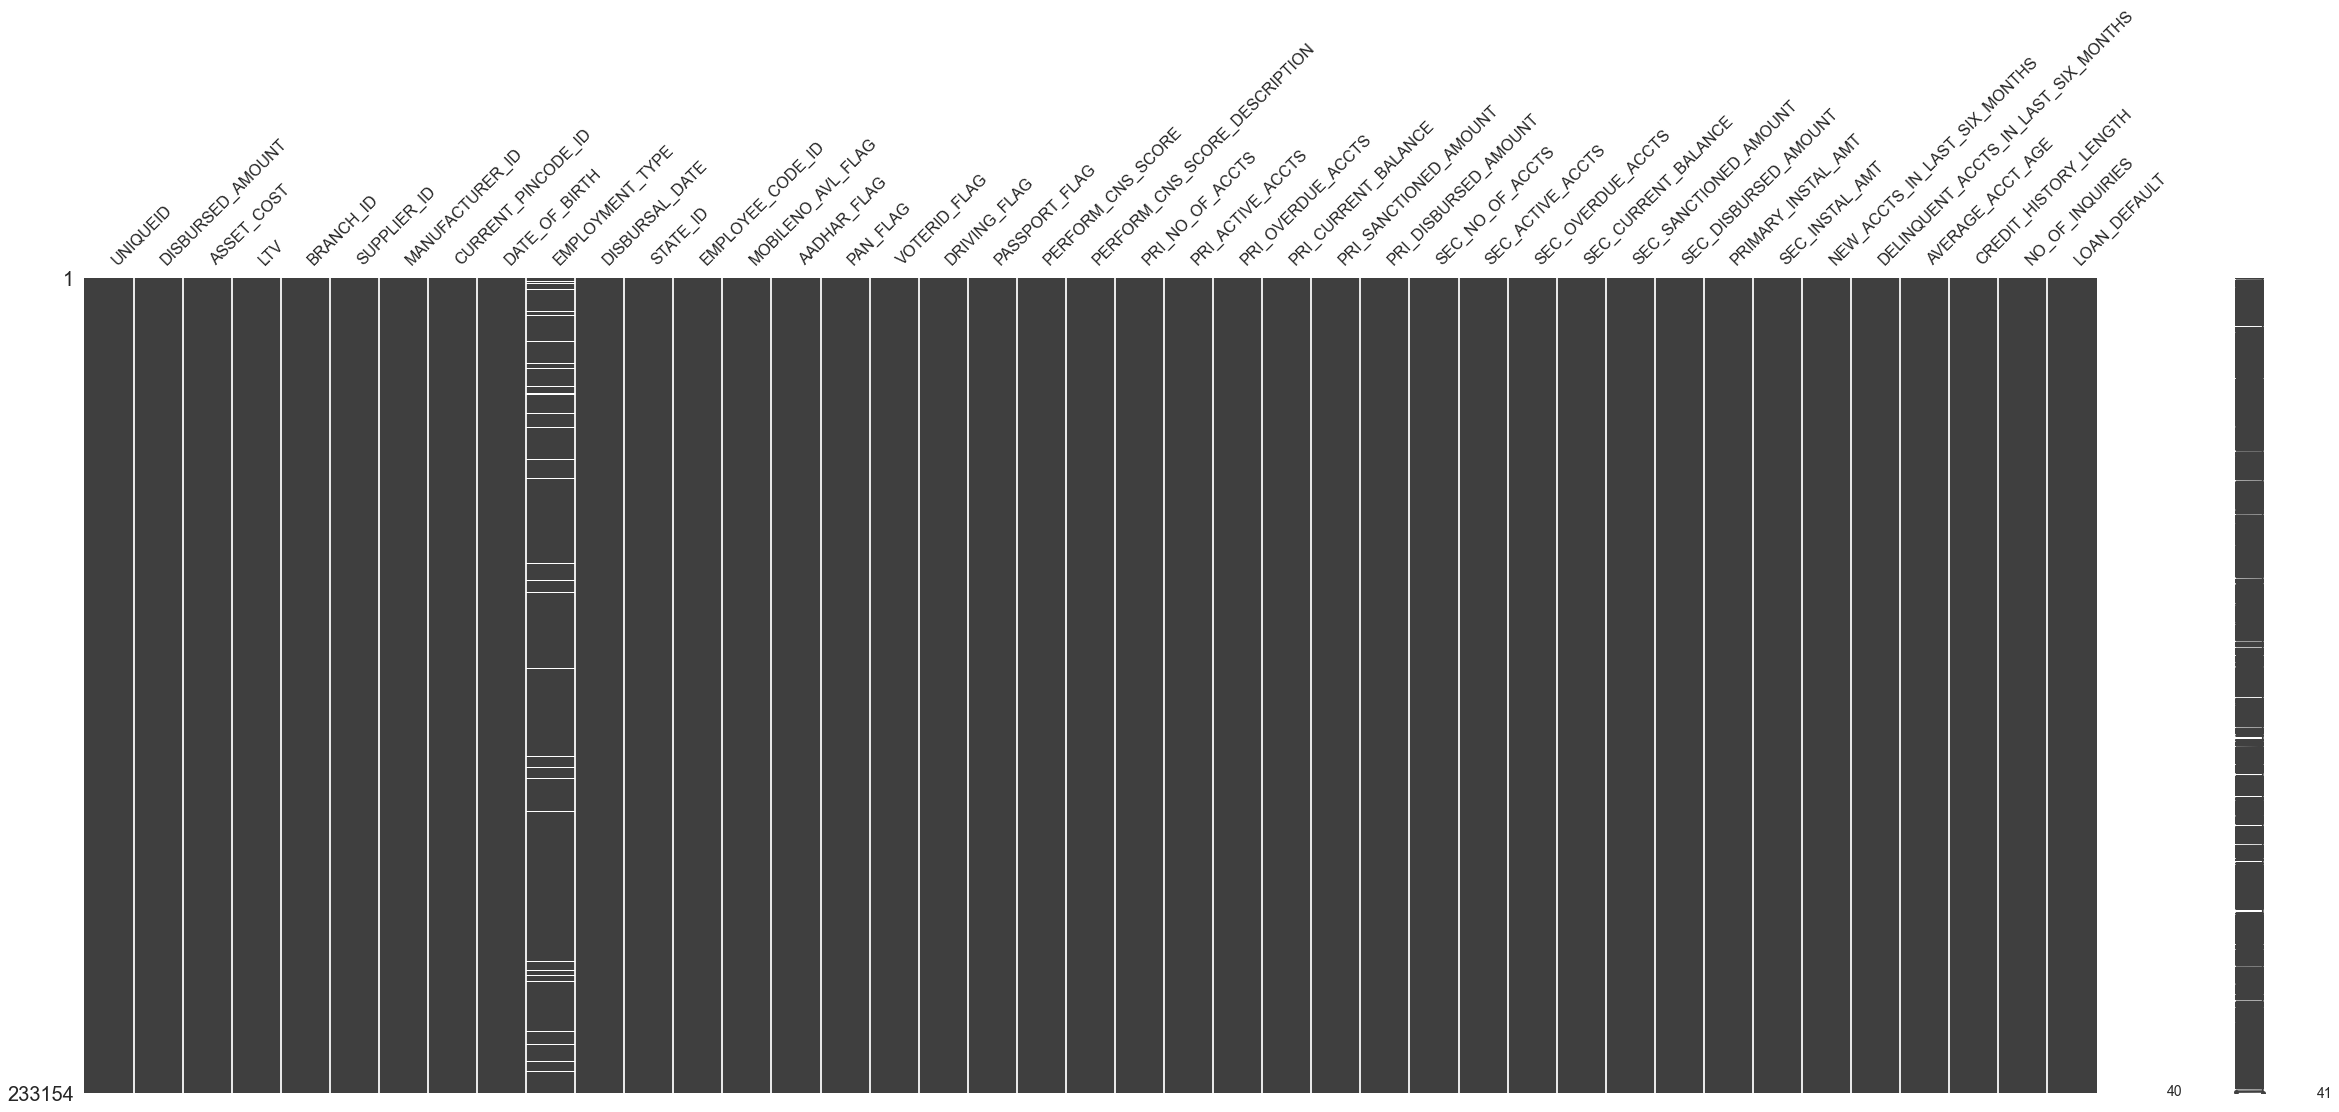

In [26]:
import missingno
missingno.matrix(train_df,figsize=(40,15))

#### Dropping missing values records as it accounts for 3% of data

In [27]:
train_df = train_df.dropna()

In [28]:
len(train_df)

225493

In [29]:
train_df['LOAN_DEFAULT'].value_counts()

0    176526
1     48967
Name: LOAN_DEFAULT, dtype: int64

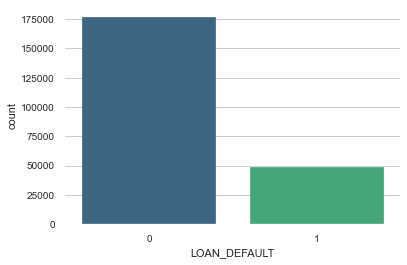

In [30]:
sns.countplot(x='LOAN_DEFAULT',data=train_df,palette='viridis')

#### The above graph shows the count of loan defaults

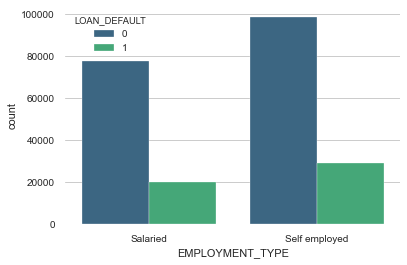

In [31]:
sns.countplot(x='EMPLOYMENT_TYPE',data=train_df,hue='LOAN_DEFAULT',palette='viridis')

#### Above graph shows loan defaults in Salaried v/s Self Employed customers

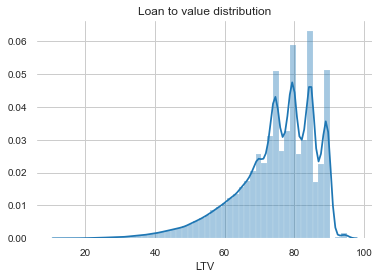

In [32]:
sns.distplot(train_df['LTV'], kde=True)
plt.title('Loan to value distribution')
##plt.savefig('ltv.png')
plt.show()

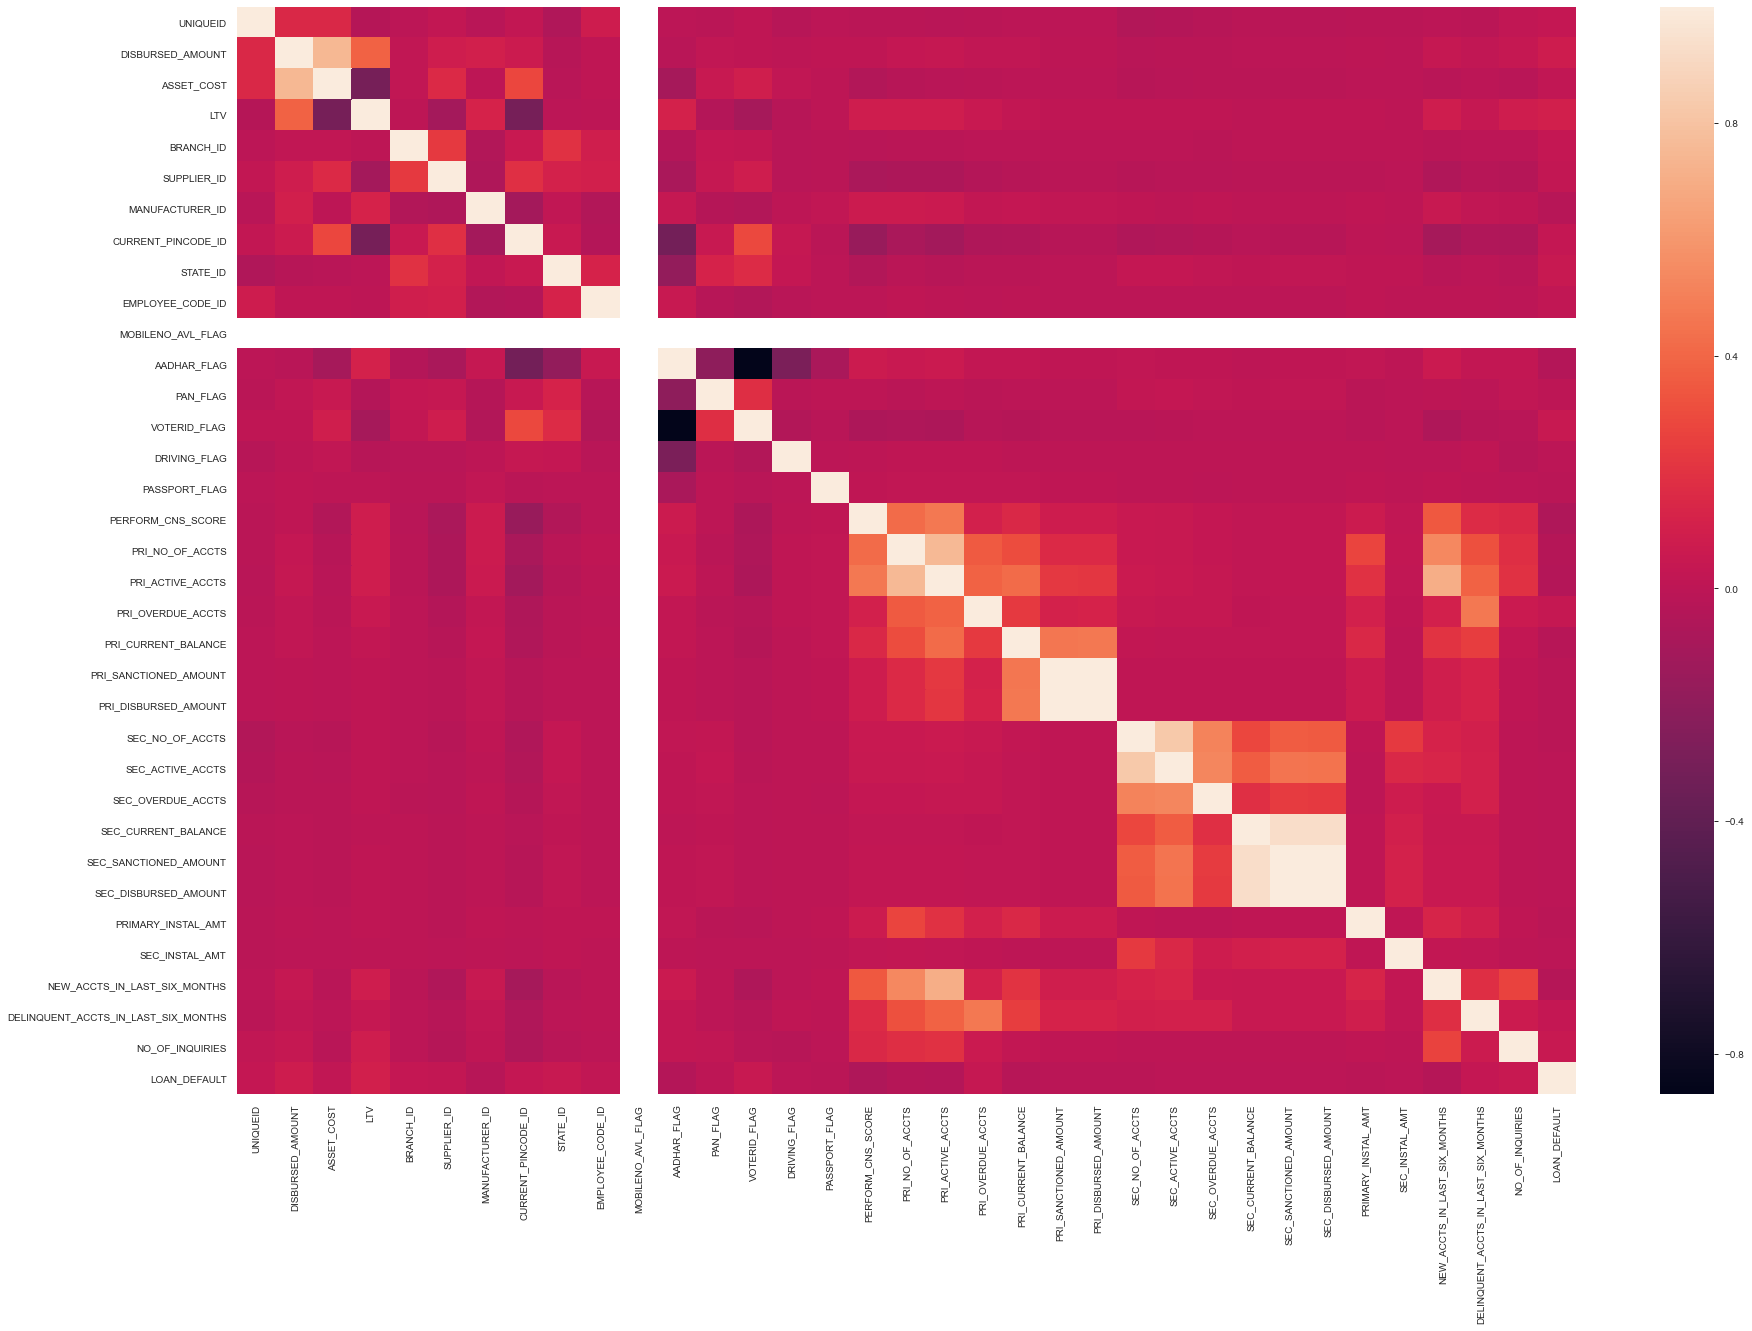

In [33]:
plt.figure(figsize=(30,20))
sns.heatmap(train_df.corr())
plt.show()

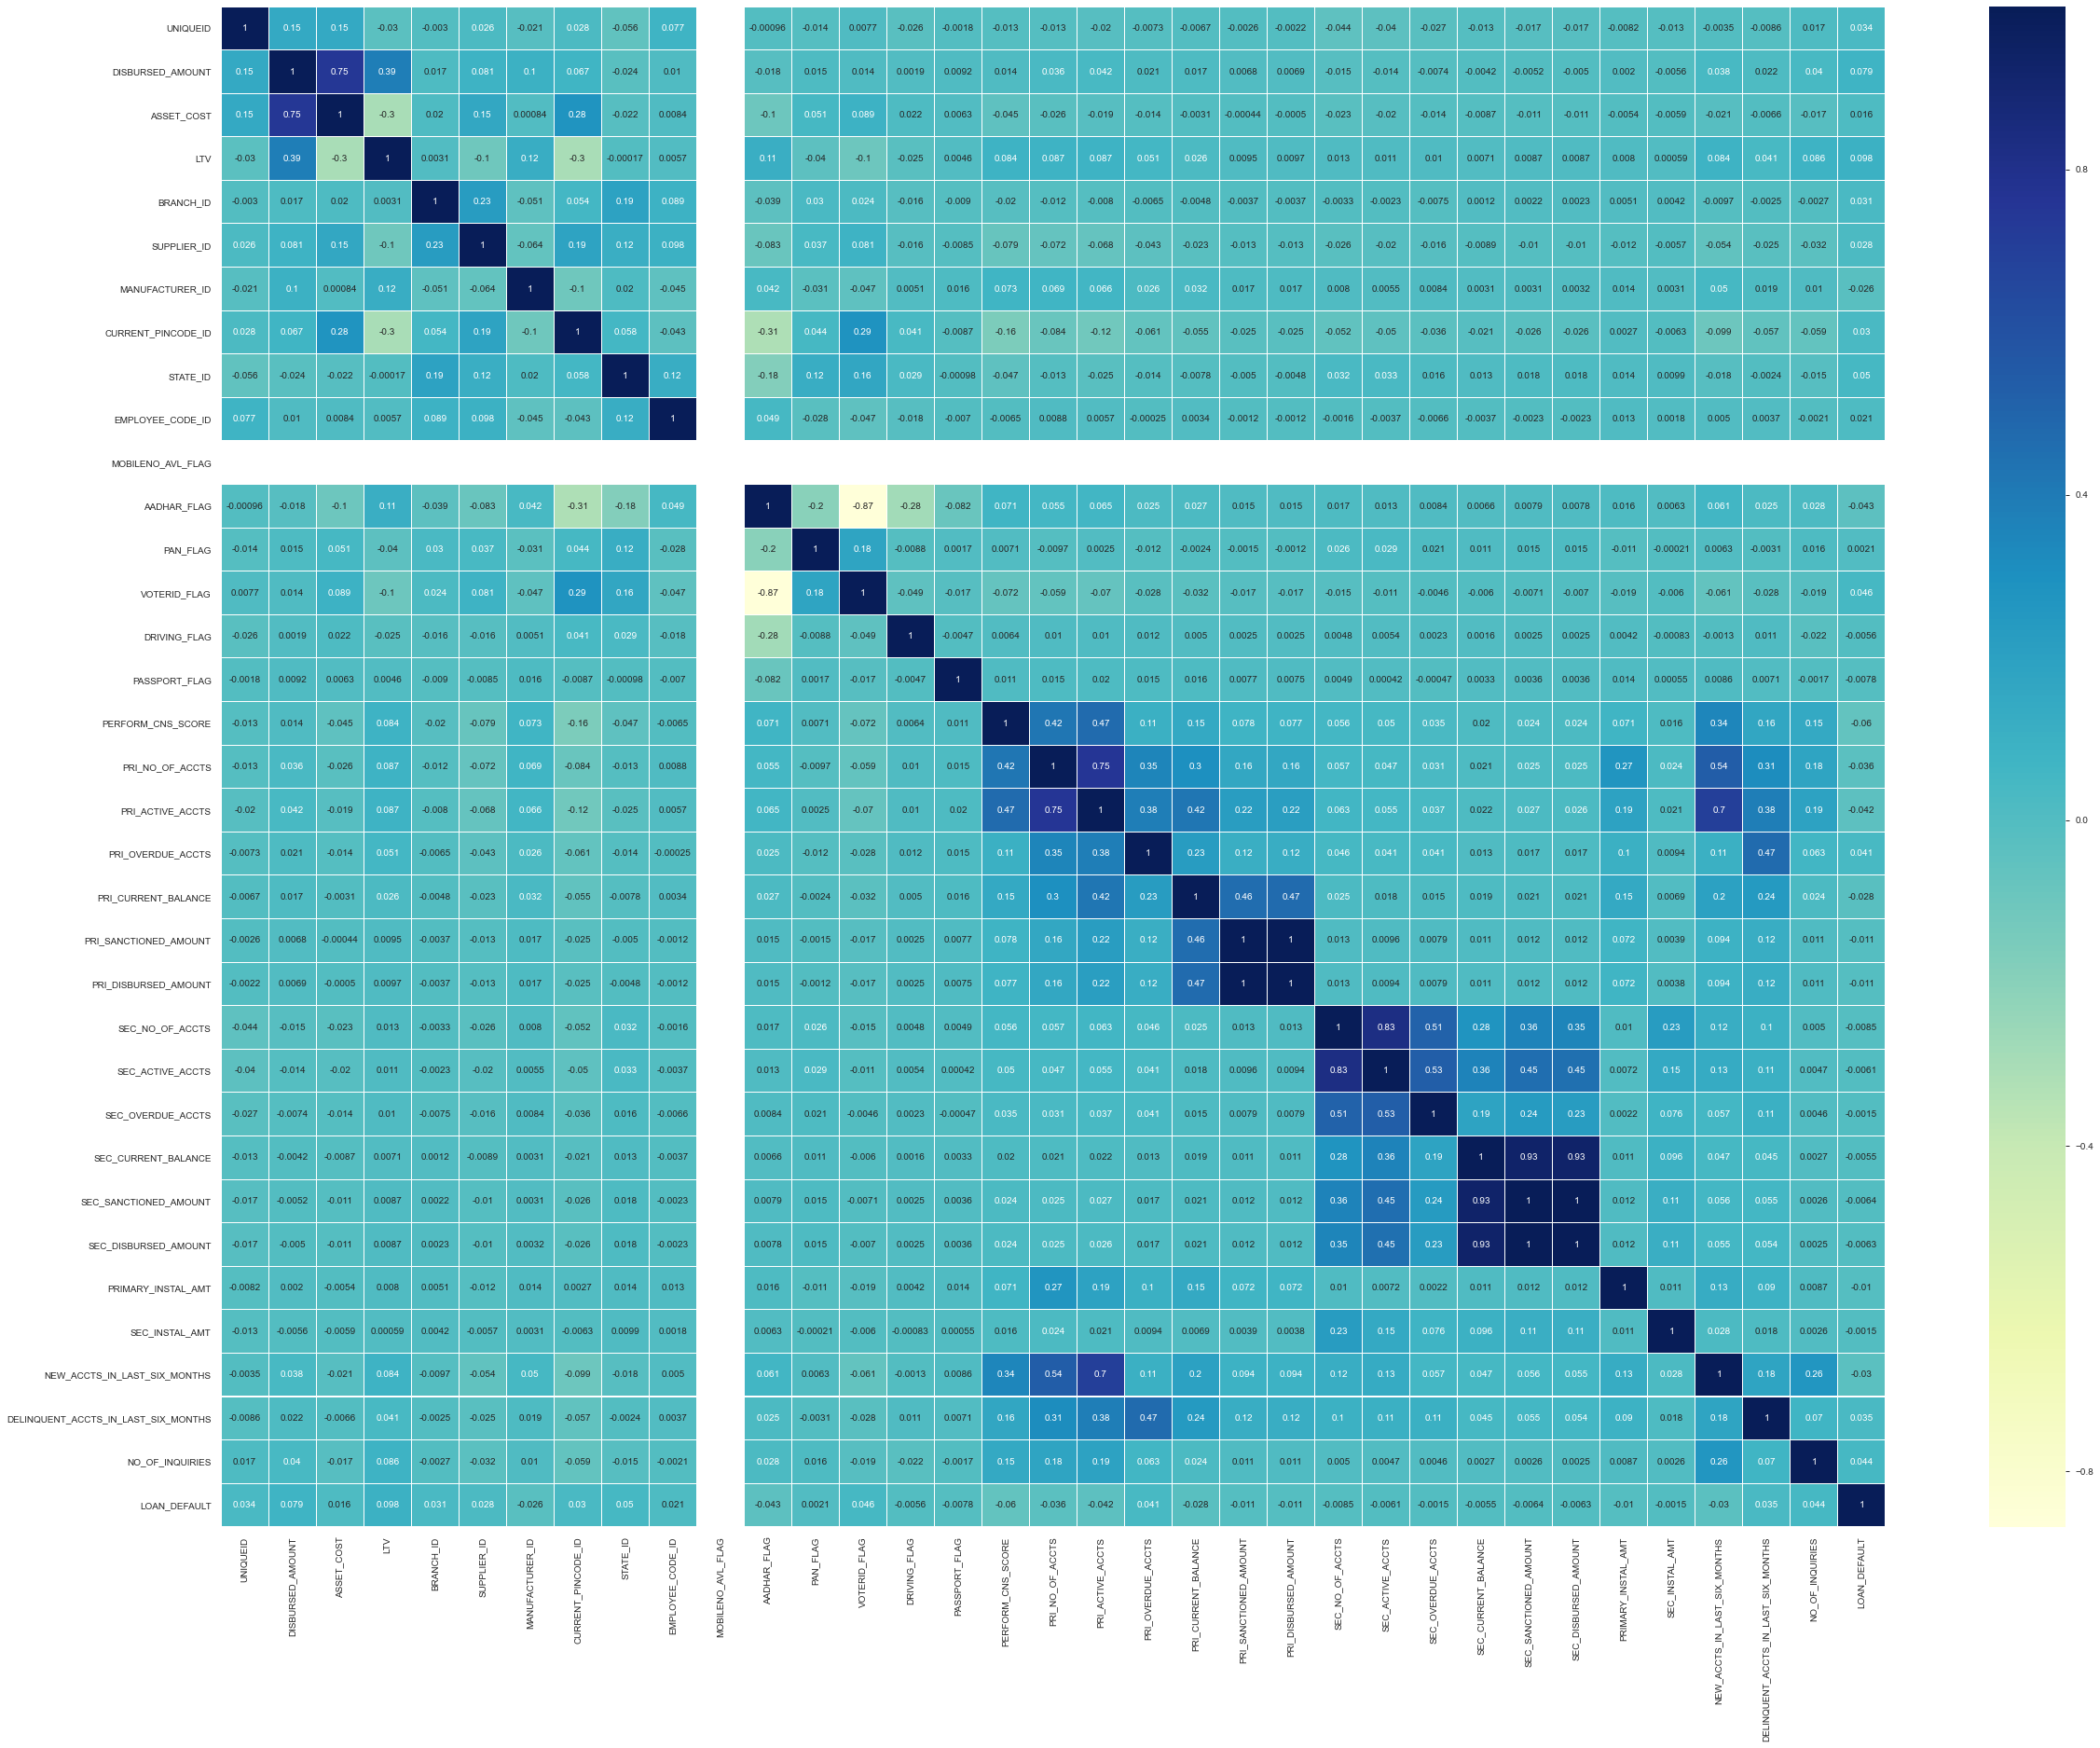

In [34]:
plt.figure(figsize=(40,30))
sns.heatmap(train_df.corr(),linewidths=0.05,annot=True,cmap='YlGnBu')
plt.show()

In [35]:
df1=train_df[train_df['LOAN_DEFAULT']==1]
df0=train_df[train_df['LOAN_DEFAULT']==0]

#### EDA on Disbursed Amount

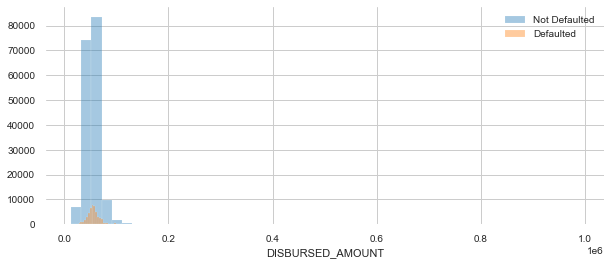

In [36]:
plt.figure(figsize=(10,4))
sns.distplot(df0['DISBURSED_AMOUNT'],kde=False)
sns.distplot(df1['DISBURSED_AMOUNT'],kde=False)
plt.legend(labels=['Not Defaulted','Defaulted'])
plt.show()

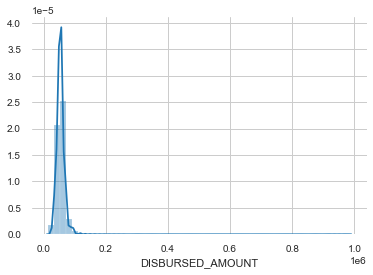

In [37]:
sns.distplot(train_df['DISBURSED_AMOUNT'])

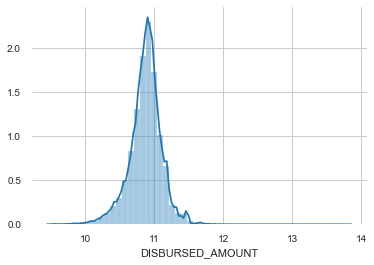

In [38]:
sns.distplot(train_df['DISBURSED_AMOUNT'].apply(lambda x:np.log(x)))

In [39]:
train_df['DISBURSED_AMOUNT']=train_df['DISBURSED_AMOUNT'].apply(lambda x:np.log(x))

#### EDA on Asset Cost

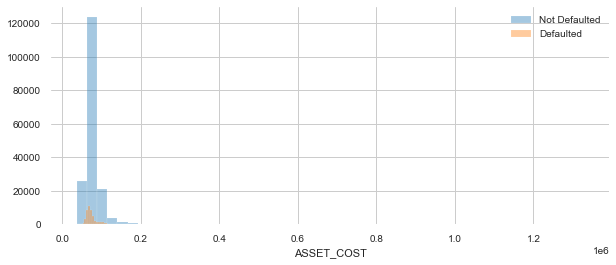

In [40]:
plt.figure(figsize=(10,4))
sns.distplot(df0['ASSET_COST'],kde=False)
sns.distplot(df1['ASSET_COST'],kde=False)
plt.legend(labels=['Not Defaulted','Defaulted'])
plt.show()

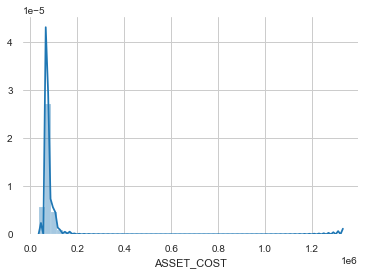

In [41]:
sns.distplot(train_df['ASSET_COST'])

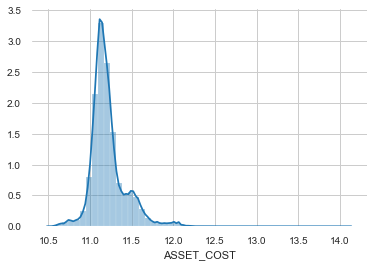

In [42]:
sns.distplot(train_df['ASSET_COST'].apply(lambda x:np.log(x)))

In [43]:
train_df['ASSET_COST']=train_df['ASSET_COST'].apply(lambda x:np.log(x))

#### EDA on Loan to Value of Vehicle(LTV)

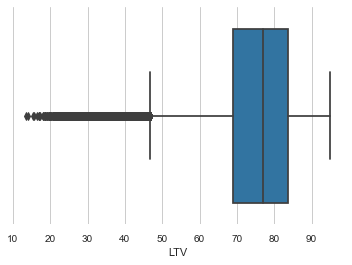

In [44]:
sns.boxplot(train_df['LTV'])

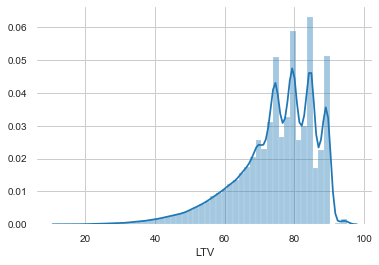

In [45]:
sns.distplot(train_df['LTV'])

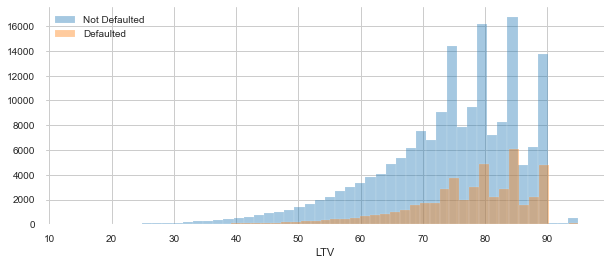

In [46]:
plt.figure(figsize=(10,4))
sns.distplot(df0['LTV'],kde=False)
sns.distplot(df1['LTV'],kde=False)
plt.legend(labels=['Not Defaulted','Defaulted'])
plt.show()

#### EDA on Birth date

In [47]:
def age(duration):
    year=int(duration.split('-')[2])
    if year>=0 and year<=19:
        return year+2000
    else:
        return year+1900

#### Above function calculates the age of customer at which the loan was disbursed

In [48]:
train_df['DATE_OF_BIRTH']=train_df['DATE_OF_BIRTH'].apply(age)

In [49]:
train_df['DISBURSAL_DATE']=train_df['DISBURSAL_DATE'].apply(age)

In [50]:
train_df['AGE_AT_DISBURSAL']=train_df['DISBURSAL_DATE']-train_df['DATE_OF_BIRTH']

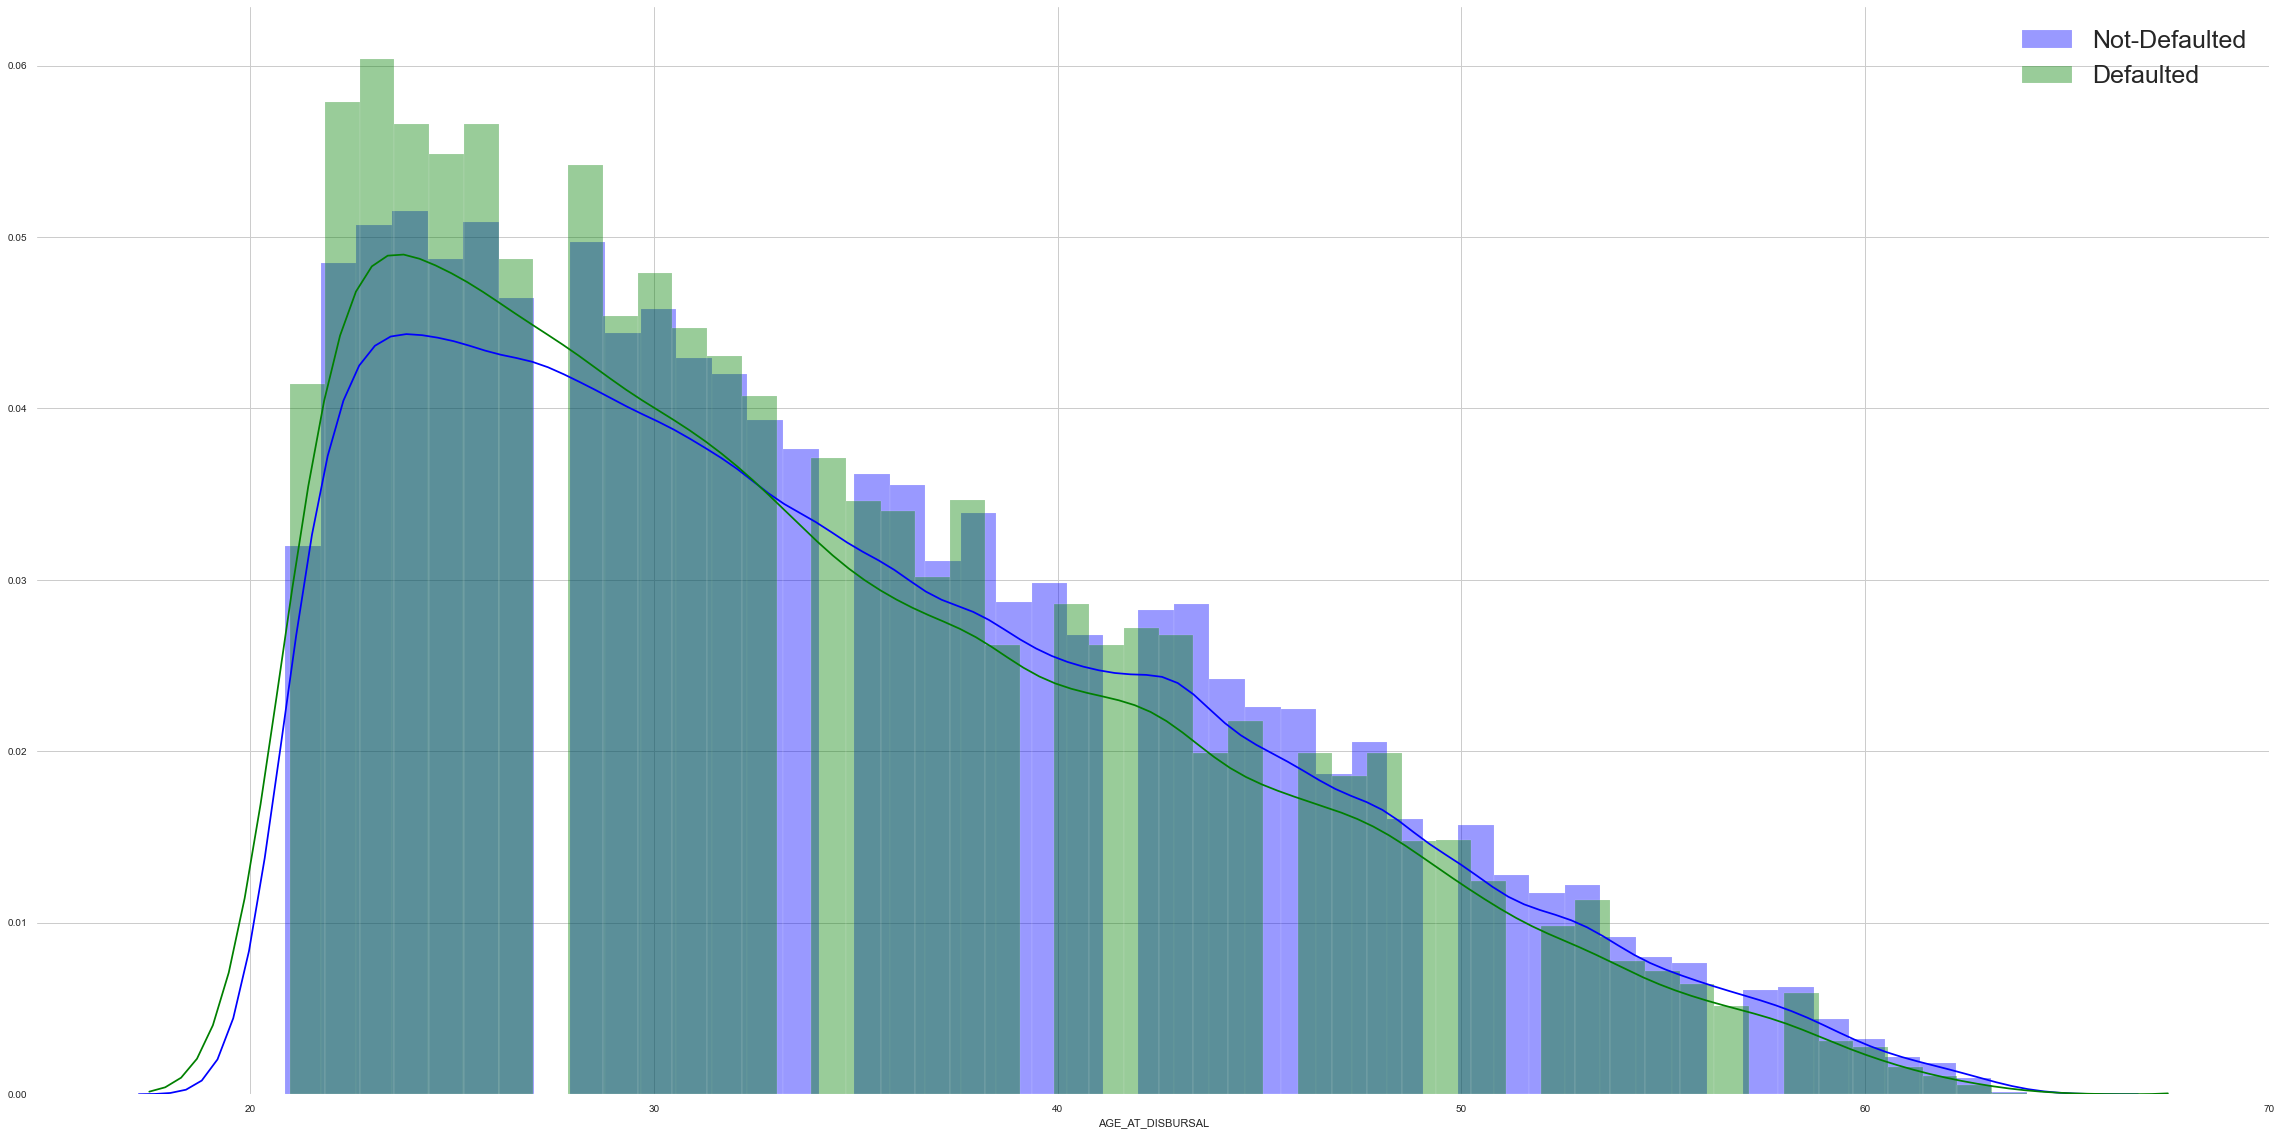

In [51]:
plt.figure(figsize=(40,20))
sns.distplot(train_df[train_df['LOAN_DEFAULT']==0]['AGE_AT_DISBURSAL'],color='b')
sns.distplot(train_df[train_df['LOAN_DEFAULT']==1]['AGE_AT_DISBURSAL'],color='g')
plt.legend(labels=['Not-Defaulted','Defaulted'],prop={'size': 25})
plt.show()

#### EDA on Bureau Score	

In [52]:
train_df[['PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION']].head(10)

,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION
0,0,No Bureau History Available
1,598,I-Medium Risk
2,0,No Bureau History Available
3,305,L-Very High Risk
4,0,No Bureau History Available
5,825,A-Very Low Risk
6,0,No Bureau History Available
7,17,Not Scored: Not Enough Info available on the c...
8,718,D-Very Low Risk
9,818,A-Very Low Risk


In [53]:
train_df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

No Bureau History Available                                111773
C-Very Low Risk                                             15715
A-Very Low Risk                                             13790
D-Very Low Risk                                             11134
B-Very Low Risk                                              9032
M-Very High Risk                                             8632
F-Low Risk                                                   8309
K-High Risk                                                  8107
H-Medium Risk                                                6695
E-Low Risk                                                   5695
I-Medium Risk                                                5440
G-Low Risk                                                   3902
Not Scored: Sufficient History Not Available                 3671
J-High Risk                                                  3667
Not Scored: Not Enough Info available on the customer        3557
Not Scored

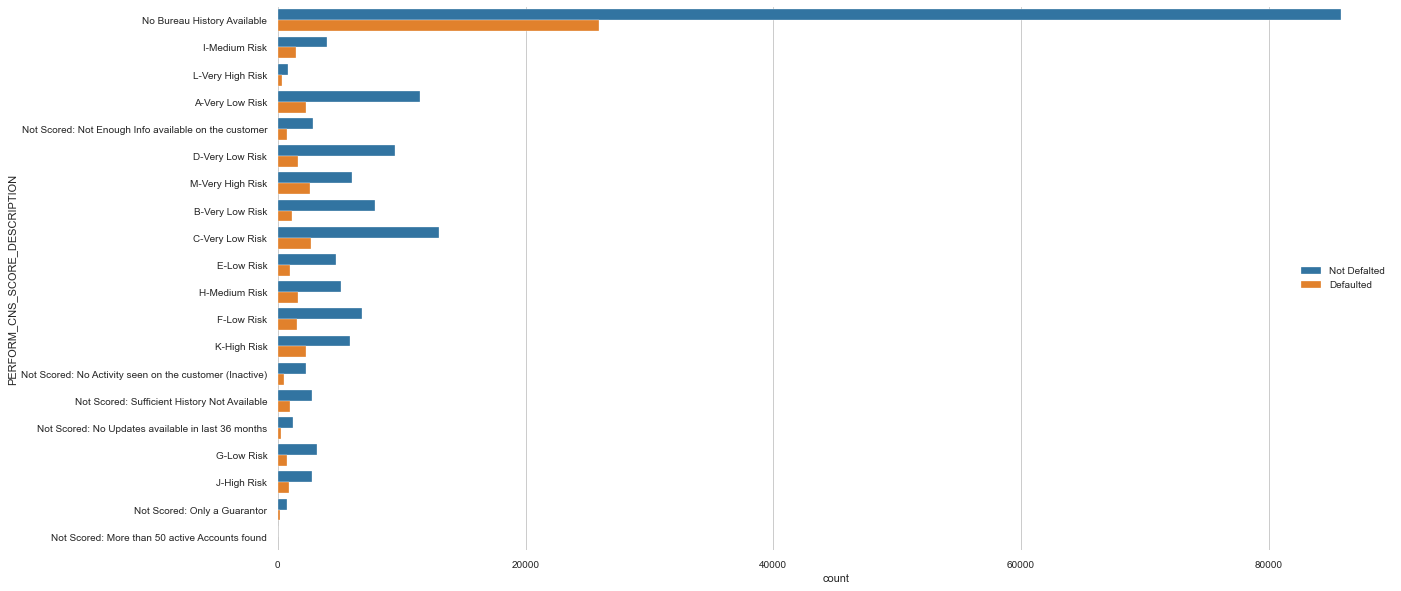

In [54]:
plt.figure(figsize=(20,10))
sns.countplot(y='PERFORM_CNS_SCORE_DESCRIPTION',hue='LOAN_DEFAULT',data=train_df)
plt.legend(labels=['Not Defalted','Defaulted'])
plt.show()

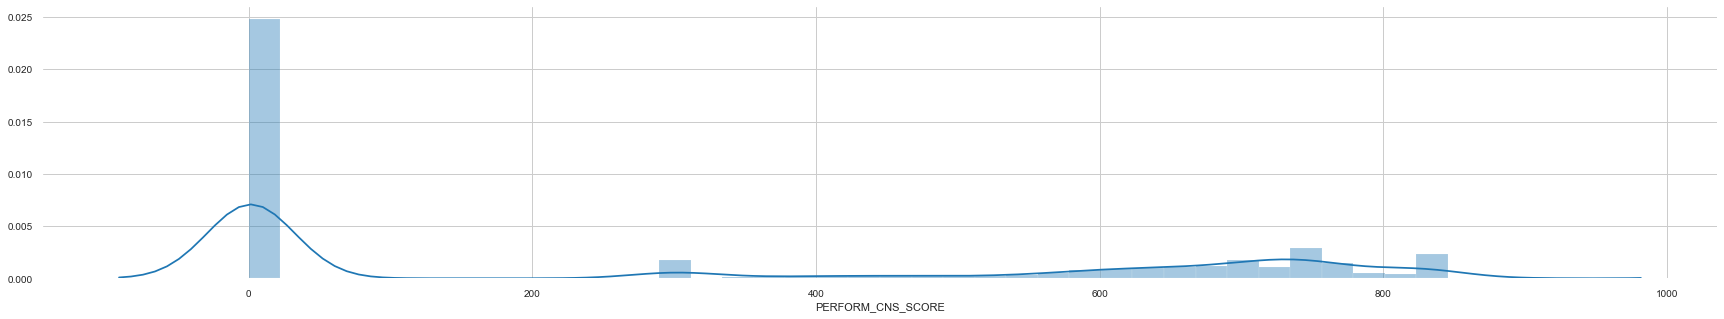

In [55]:
plt.figure(figsize=(30,5))
sns.distplot(train_df['PERFORM_CNS_SCORE'])
plt.show()

In [56]:
def cns_score(score):
    if score<100:
        return 0
    elif (score>=100) & (score<200):
        return 1
    elif (score>=200) & (score<300):
        return 2
    elif (score>=300) & (score<400):
        return 3
    elif (score>=400) & (score<500):
        return 4
    elif (score>=500) & (score<600):
        return 5
    elif (score>=600) & (score <700):
        return 6
    elif (score>=700) & (score <800):
        return 7
    elif (score>=800) & (score <900):
        return 8
    elif (score>=900) & (score <1000):
        return 9
    else:
        return 10

In [57]:
train_df['PERFORM_CNS_SCORE']=train_df['PERFORM_CNS_SCORE'].map(lambda x:cns_score(x))

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_df['PERFORM_CNS_SCORE_DESCRIPTION']=le.fit_transform(train_df['PERFORM_CNS_SCORE_DESCRIPTION'])
train_df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

13    111773
2      15715
0      13790
3      11134
1       9032
12      8632
5       8309
10      8107
7       6695
4       5695
8       5440
6       3902
19      3671
9       3667
17      3557
15      2815
16      1477
11      1122
18       957
14         3
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: int64

In [59]:
train_df[['PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION']].head(10)

,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION
0,0,13
1,5,8
2,0,13
3,3,11
4,0,13
5,8,0
6,0,13
7,0,17
8,7,3
9,8,0


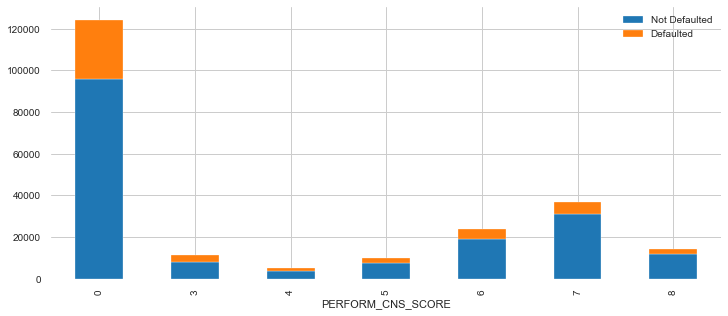

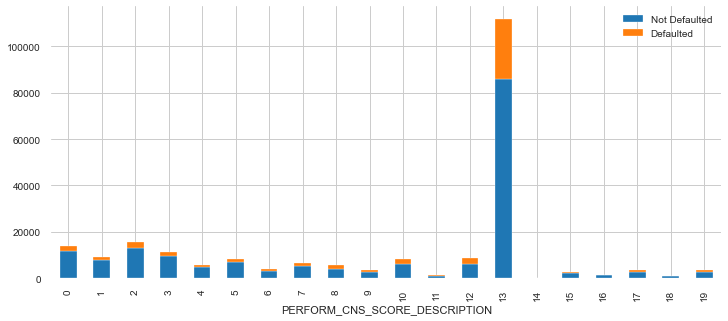

In [60]:
count=1
for i in ['PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION']:
    #plt.subplot(2,1,count)
    ct=pd.crosstab(train_df[i], train_df['LOAN_DEFAULT'])
    ct.plot.bar(stacked=True,figsize=(12,5))
    plt.legend(labels=['Not Defaulted','Defaulted'])
    plt.show()
    count+=1

## Feature Engineering

#### Dropping columns with less standard deviation

In [61]:
train_df.std() > 0.3

UNIQUEID                                True
DISBURSED_AMOUNT                       False
ASSET_COST                             False
LTV                                     True
BRANCH_ID                               True
SUPPLIER_ID                             True
MANUFACTURER_ID                         True
CURRENT_PINCODE_ID                      True
DATE_OF_BIRTH                           True
DISBURSAL_DATE                         False
STATE_ID                                True
EMPLOYEE_CODE_ID                        True
MOBILENO_AVL_FLAG                      False
AADHAR_FLAG                             True
PAN_FLAG                               False
VOTERID_FLAG                            True
DRIVING_FLAG                           False
PASSPORT_FLAG                          False
PERFORM_CNS_SCORE                       True
PERFORM_CNS_SCORE_DESCRIPTION           True
PRI_NO_OF_ACCTS                         True
PRI_ACTIVE_ACCTS                        True
PRI_OVERDU

In [62]:
# Dropping unnecessary columns
train_df_new = train_df.drop(['MOBILENO_AVL_FLAG', 'PAN_FLAG', 'DRIVING_FLAG','PASSPORT_FLAG','SEC_OVERDUE_ACCTS'], axis = 1).copy()

#### Dropping columns with too many categories

In [63]:
for column in ['UNIQUEID','AADHAR_FLAG', 'BRANCH_ID', 'CURRENT_PINCODE_ID','EMPLOYEE_CODE_ID', 'LOAN_DEFAULT', 
               'MANUFACTURER_ID', 'STATE_ID', 'SUPPLIER_ID', 'VOTERID_FLAG', 
               'PERFORM_CNS_SCORE_DESCRIPTION','EMPLOYMENT_TYPE']:
    train_df_new[column] = train_df_new[column].astype('category')

In [64]:
train_df_new.select_dtypes(include=['category']).nunique()

UNIQUEID                         225493
BRANCH_ID                            82
SUPPLIER_ID                        2945
MANUFACTURER_ID                      11
CURRENT_PINCODE_ID                 6659
EMPLOYMENT_TYPE                       2
STATE_ID                             22
EMPLOYEE_CODE_ID                   3269
AADHAR_FLAG                           2
VOTERID_FLAG                          2
PERFORM_CNS_SCORE_DESCRIPTION        20
LOAN_DEFAULT                          2
dtype: int64

In [65]:
# Dropping unnecessary columns
train_df_new = train_df_new.drop(['SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID'], axis = 1).copy()

#### Removing columns that has more similar values

In [66]:
#print(train_df_new['MOBILENO_AVL_FLAG'].value_counts().head())
print(train_df_new['AADHAR_FLAG'].value_counts().head())
print(train_df_new['STATE_ID'].value_counts().head())
#print(train_df_new['PAN_FLAG'].value_counts().head())
print(train_df_new['VOTERID_FLAG'].value_counts().head())
#print(train_df_new['DRIVING_FLAG'].value_counts().head())
print(train_df_new['PRI_NO_OF_ACCTS'].value_counts().head())
print(train_df_new['PRI_ACTIVE_ACCTS'].value_counts().head())
print(train_df_new['PRI_OVERDUE_ACCTS'].value_counts().head())
print(train_df_new['SEC_NO_OF_ACCTS'].value_counts().head())
print(train_df_new['SEC_ACTIVE_ACCTS'].value_counts().head())
#print(train_df_new['SEC_OVERDUE_ACCTS'].value_counts().head()) 
print(train_df_new['SEC_CURRENT_BALANCE'].value_counts().head()) 
print(train_df_new['SEC_SANCTIONED_AMOUNT'].value_counts().head()) 
print(train_df_new['SEC_DISBURSED_AMOUNT'].value_counts().head()) 
print(train_df_new['SEC_INSTAL_AMT'].value_counts().head())
print(train_df_new['NEW_ACCTS_IN_LAST_SIX_MONTHS'].value_counts().head())
print(train_df_new['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'].value_counts().head())
print(train_df_new['NO_OF_INQUIRIES'].value_counts().head())
print(train_df_new['BRANCH_ID'].value_counts().head())
print(train_df_new['MANUFACTURER_ID'].value_counts().head())

1    188900
0     36593
Name: AADHAR_FLAG, dtype: int64
4     44234
6     32958
3     31640
13    17858
9     15690
Name: STATE_ID, dtype: int64
0    192317
1     33176
Name: VOTERID_FLAG, dtype: int64
0    111773
1     34154
2     19426
3     12787
4      9159
Name: PRI_NO_OF_ACCTS, dtype: int64
0    131395
1     41050
2     21138
3     12044
4      7306
Name: PRI_ACTIVE_ACCTS, dtype: int64
0    199703
1     19596
2      4226
3      1175
4       399
Name: PRI_OVERDUE_ACCTS, dtype: int64
0    219731
1      3396
2      1022
3       438
4       289
Name: SEC_NO_OF_ACCTS, dtype: int64
0    221737
1      2637
2       627
3       193
4       116
Name: SEC_ACTIVE_ACCTS, dtype: int64
0       222182
800         10
400          8
100          8
1200         6
Name: SEC_CURRENT_BALANCE, dtype: int64
0         221816
50000         82
100000        60
30000         43
200000        38
Name: SEC_SANCTIONED_AMOUNT, dtype: int64
0         221846
50000         58
100000        46
200000        36
4000

In [67]:
# Dropping unnecessary columns
train_df_new = train_df_new.drop(['SEC_DISBURSED_AMOUNT', 'SEC_SANCTIONED_AMOUNT', 'SEC_INSTAL_AMT','SEC_CURRENT_BALANCE','SEC_ACTIVE_ACCTS','SEC_NO_OF_ACCTS'], axis = 1).copy()

In [68]:
train_df_new.dtypes

UNIQUEID                               category
DISBURSED_AMOUNT                        float64
ASSET_COST                              float64
LTV                                     float64
BRANCH_ID                              category
MANUFACTURER_ID                        category
DATE_OF_BIRTH                             int64
EMPLOYMENT_TYPE                        category
DISBURSAL_DATE                            int64
STATE_ID                               category
AADHAR_FLAG                            category
VOTERID_FLAG                           category
PERFORM_CNS_SCORE                         int64
PERFORM_CNS_SCORE_DESCRIPTION          category
PRI_NO_OF_ACCTS                           int64
PRI_ACTIVE_ACCTS                          int64
PRI_OVERDUE_ACCTS                         int64
PRI_CURRENT_BALANCE                       int64
PRI_SANCTIONED_AMOUNT                     int64
PRI_DISBURSED_AMOUNT                      int64
PRIMARY_INSTAL_AMT                      

#### Dropping other columns that are not required for classification

In [69]:
train_df_new = train_df_new.drop(['UNIQUEID','AADHAR_FLAG','BRANCH_ID','PERFORM_CNS_SCORE_DESCRIPTION','DISBURSAL_DATE','MANUFACTURER_ID','STATE_ID','VOTERID_FLAG','DATE_OF_BIRTH'], axis = 1).copy()

#### Converting years and months to only months

In [70]:
new = []
for items in train_df_new['AVERAGE_ACCT_AGE'].values: 
    y = int(items[0]) * 12
    if items[6]== 'm':
        m = int(items[5])
    else:
        m = int(items[5:7])
    total = y + m
    new.append(total)

train_df_new.loc[:, 'AVERAGE_ACCT_AGE'] = new



new = []
for items in train_df_new['CREDIT_HISTORY_LENGTH'].values: 
    y = int(items[0]) * 12
    if items[6]== 'm':
        m = int(items[5])
    else:
        m = int(items[5:7])
    total = y + m
    new.append(total)

train_df_new.loc[:, 'CREDIT_HISTORY_LENGTH'] = new

#### Removing 100k records from 116k records which doesn't have CNS score 

In [71]:
train_new = train_df_new[(train_df_new['PERFORM_CNS_SCORE'] == 0)].head(100000).index

In [72]:
train_new

Int64Index([     0,      2,      4,      6,      7,     15,     22,     24,
                25,     26,
            ...
            187846, 187847, 187850, 187852, 187853, 187854, 187855, 187858,
            187860, 187862],
           dtype='int64', length=100000)

In [73]:
train_df_new.drop(train_new,inplace=True)

In [74]:
train_df_new.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE_AT_DISBURSAL
1,10.760983,11.090568,73.23,Self employed,5,1,1,1,27600,50200,50200,1991,0,1,23,23,0,1,33
3,10.959766,11.099121,88.48,Self employed,3,3,0,0,0,0,0,31,0,0,8,15,1,1,25
5,10.906194,11.033275,89.66,Self employed,8,2,0,0,0,0,0,1347,0,0,21,24,0,0,28
8,10.891410,11.034454,89.56,Self employed,7,1,1,0,-41,365384,365384,0,0,0,56,56,1,0,27
9,10.870528,11.023535,86.95,Salaried,8,1,0,0,0,0,0,2608,0,0,19,19,0,0,50


In [75]:
loan = train_df_new.reset_index(drop=True)

In [76]:
loan.dtypes

DISBURSED_AMOUNT                        float64
ASSET_COST                              float64
LTV                                     float64
EMPLOYMENT_TYPE                        category
PERFORM_CNS_SCORE                         int64
PRI_NO_OF_ACCTS                           int64
PRI_ACTIVE_ACCTS                          int64
PRI_OVERDUE_ACCTS                         int64
PRI_CURRENT_BALANCE                       int64
PRI_SANCTIONED_AMOUNT                     int64
PRI_DISBURSED_AMOUNT                      int64
PRIMARY_INSTAL_AMT                        int64
NEW_ACCTS_IN_LAST_SIX_MONTHS              int64
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS       int64
AVERAGE_ACCT_AGE                          int64
CREDIT_HISTORY_LENGTH                     int64
NO_OF_INQUIRIES                           int64
LOAN_DEFAULT                           category
AGE_AT_DISBURSAL                          int64
dtype: object

In [77]:
loan.to_csv('train.csv', sep='\t')

### Train and Test Split

In [78]:
train = loan.drop('LOAN_DEFAULT', axis=1)
test = loan[['LOAN_DEFAULT']]

In [79]:
train.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,AGE_AT_DISBURSAL
0,10.760983,11.090568,73.23,Self employed,5,1,1,1,27600,50200,50200,1991,0,1,23,23,0,33
1,10.959766,11.099121,88.48,Self employed,3,3,0,0,0,0,0,31,0,0,8,15,1,25
2,10.906194,11.033275,89.66,Self employed,8,2,0,0,0,0,0,1347,0,0,21,24,0,28
3,10.891410,11.034454,89.56,Self employed,7,1,1,0,-41,365384,365384,0,0,0,56,56,1,27
4,10.870528,11.023535,86.95,Salaried,8,1,0,0,0,0,0,2608,0,0,19,19,0,50


In [80]:
test.head()

,LOAN_DEFAULT
0,1
1,1
2,0
3,0
4,0


In [81]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)

#### Convert string to float

In [82]:
from sklearn import preprocessing 

### label encode the categorical values and convert them to numbers 
le = preprocessing.LabelEncoder()
le.fit(X_train['EMPLOYMENT_TYPE'].astype(str))
X_train['EMPLOYMENT_TYPE'] = le.transform(X_train['EMPLOYMENT_TYPE'].astype(str))
X_test['EMPLOYMENT_TYPE'] = le.transform(X_test['EMPLOYMENT_TYPE'].astype(str))

C:\Users\Dt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


## MODELS

In [83]:
from sklearn.linear_model import LogisticRegression # simplest classifier
from sklearn.tree import DecisionTreeClassifier # weak learner
from sklearn.svm import LinearSVC # subvector machine
from sklearn.neural_network import MLPClassifier # neural network
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier # tree ensemble
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [84]:
from sklearn.metrics import roc_curve, auc
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print ("Accuracy Score: %.3f " % (accuracy_score(y_test, predictions)*100))
    print ("ROC Curve: ")
    
    fpr, tpr, thresholds = roc_curve(predict_test, y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    

## K-nearest Neighbors classification

C:\Users\Dt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy Score: 75.561 


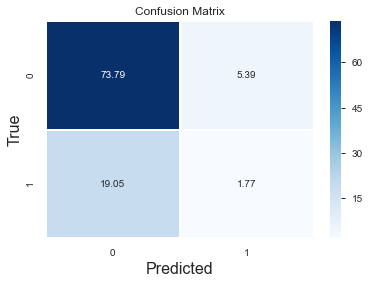

In [184]:
knc = KNeighborsClassifier()

knc.fit(X_train,y_train)

predict_test = knc.predict(X_test)

acc_knc = (accuracy_score(y_test, predict_test)*100)
print ("Accuracy Score: %.3f " % acc_knc)

confusion = confusion_matrix(y_test, predict_test)
df_confusion = pd.DataFrame(100*confusion/float(confusion.sum()))
a = sns.heatmap(df_confusion.round(2), annot=True, cmap='Blues', fmt='g', linewidths=1)
a.set_title("Confusion Matrix")
a.set_xlabel('Predicted', fontsize=16)
a.set_ylabel('True', fontsize=16, rotation=90)
plt.show()

### *ROC Curve*

[0.         0.24749722 1.        ]


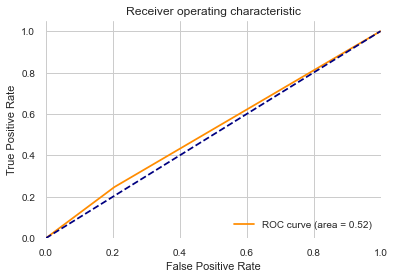

In [185]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predict_test, y_test)
roc_auc = auc(fpr, tpr)
print(tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## K-nearest Neighbors classification - Grid Search

In [69]:
# Create a based model
clf = KNeighborsClassifier()
clf.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [70]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_neighbors': [3,5,11,19,25]
}

# Instantiate the grid search model
gs = GridSearchCV(KNeighborsClassifier(), param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.5min finished
C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [71]:
gs.best_params_

{'n_neighbors': 25}

In [72]:
best_grid = gs.best_estimator_

C:\Users\Dt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy Score: 79.059 
ROC Curve: 


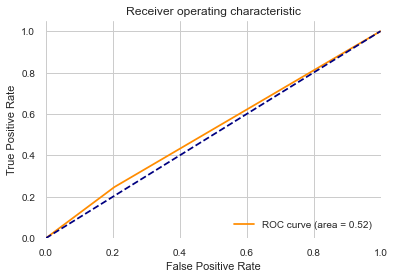

In [73]:
evaluate(best_grid,X_train,y_train, X_test, y_test)

## LogisticRegression

C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 79.178 


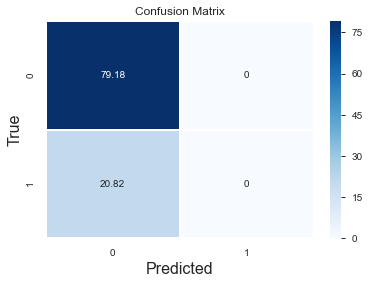

In [85]:
log = LogisticRegression()

log.fit(X_train,y_train)

predict_test = log.predict(X_test)

print ("Accuracy Score: %.3f " % (accuracy_score(y_test, predict_test)*100))

confusion = confusion_matrix(y_test, predict_test)
df_confusion = pd.DataFrame(100*confusion/float(confusion.sum()))
a = sns.heatmap(df_confusion.round(2), annot=True, cmap='Blues', fmt='g', linewidths=1)
a.set_title("Confusion Matrix")
a.set_xlabel('Predicted', fontsize=16)
a.set_ylabel('True', fontsize=16, rotation=90)
plt.show()

### *ROC Curve*

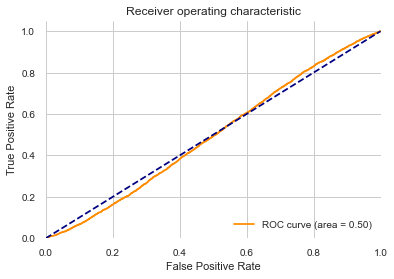

In [88]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression - Grid Search

In [89]:
# Create a based model
clf = LogisticRegression()
clf.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [90]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 5),
    'solver' : ['liblinear']
}

# Instantiate the grid search model
gs = GridSearchCV(LogisticRegression(), param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.8min finished
C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
gs.best_params_

{'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}

In [92]:
best_grid = gs.best_estimator_

In [94]:
best_grid.fit(X_train,y_train)
predictions = best_grid.predict(X_test)
print ("Accuracy Score: %.3f " % (accuracy_score(y_test, predictions)*100))

C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 79.178 


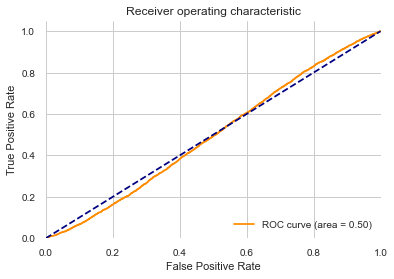

In [95]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Linear Discriminant Analysis

C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 79.043 
Presion Score: 79.043


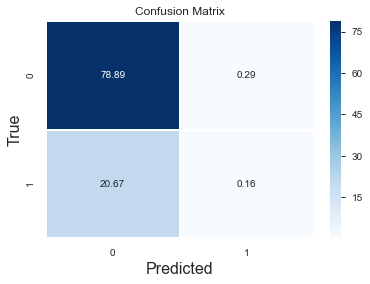

In [81]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train,y_train)

predict_test = lda.predict(X_test)

print ("Accuracy Score: %.3f " % (accuracy_score(y_test, predict_test)*100))

confusion = confusion_matrix(y_test, predict_test)
df_confusion = pd.DataFrame(100*confusion/float(confusion.sum()))
a = sns.heatmap(df_confusion.round(2), annot=True, cmap='Blues', fmt='g', linewidths=1)
a.set_title("Confusion Matrix")
a.set_xlabel('Predicted', fontsize=16)
a.set_ylabel('True', fontsize=16, rotation=90)
plt.show()

### *ROC Curve*

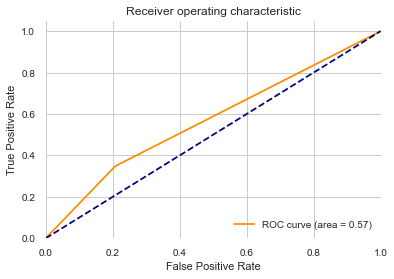

In [82]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predict_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Linear Discriminant Analysis - Grid Search

In [83]:
# Create a based model
clf = LinearDiscriminantAnalysis()
clf.get_params().keys()

dict_keys(['n_components', 'priors', 'shrinkage', 'solver', 'store_covariance', 'tol'])

In [84]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_components' : [3,5,10],
    'solver' : ['eigen','svd']
}

# Instantiate the grid search model
gs = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.2s finished
C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
gs.best_params_

{'n_components': 3, 'solver': 'eigen'}

In [86]:
best_grid = gs.best_estimator_

C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 79.178 
ROC Curve: 


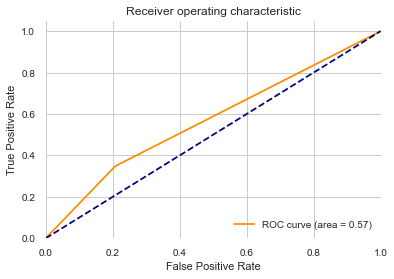

In [87]:
evaluate(best_grid,X_train,y_train, X_test, y_test)

## Decision Tree Classifier 

Accuracy Score: 67.696 
Presion Score: 67.696


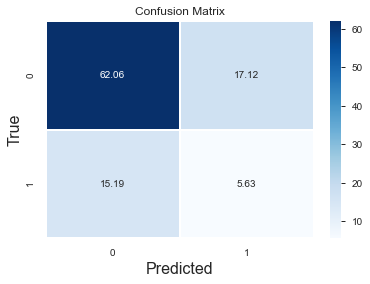

In [88]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)

predict_test = dtc.predict(X_test)

print ("Accuracy Score: %.3f " % (accuracy_score(y_test, predict_test)*100))

confusion = confusion_matrix(y_test, predict_test)
df_confusion = pd.DataFrame(100*confusion/float(confusion.sum()))
a = sns.heatmap(df_confusion.round(2), annot=True, cmap='Blues', fmt='g', linewidths=1)
a.set_title("Confusion Matrix")
a.set_xlabel('Predicted', fontsize=16)
a.set_ylabel('True', fontsize=16, rotation=90)
plt.show()

### *ROC Curve*

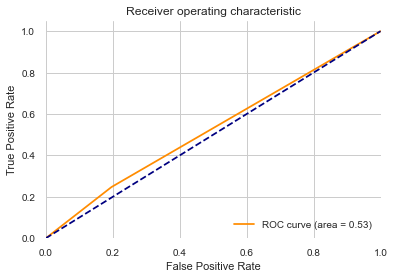

In [89]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predict_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Decision Tree Classifier - Grid Search

In [90]:
# Create a based model
clf = DecisionTreeClassifier()
clf.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [91]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_split': [2,3,5],
    'min_samples_leaf' : [1,2,3],
    'criterion' : ['gini', 'entropy']
}

# Instantiate the grid search model
gs = GridSearchCV(DecisionTreeClassifier(), param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   30.0s finished


In [92]:
gs.best_params_

{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 5}

In [93]:
best_grid = gs.best_estimator_

Accuracy Score: 70.250 
ROC Curve: 


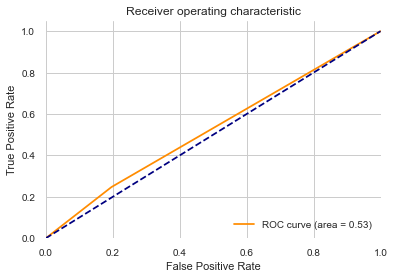

In [94]:
evaluate(best_grid,X_train,y_train, X_test, y_test)

## Random Forest Classifier

C:\Users\Dt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy Score: 77.656 
Presion Score: 77.656


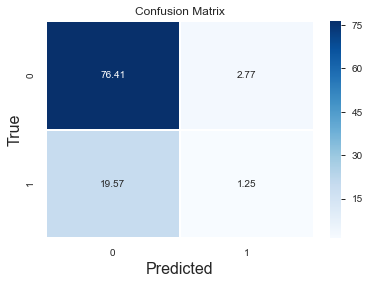

In [95]:
rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

predict_test = rfc.predict(X_test)

print ("Accuracy Score: %.3f " % (accuracy_score(y_test, predict_test)*100))

confusion = confusion_matrix(y_test, predict_test)
df_confusion = pd.DataFrame(100*confusion/float(confusion.sum()))
a = sns.heatmap(df_confusion.round(2), annot=True, cmap='Blues', fmt='g', linewidths=1)
a.set_title("Confusion Matrix")
a.set_xlabel('Predicted', fontsize=16)
a.set_ylabel('True', fontsize=16, rotation=90)
plt.show()

### *ROC Curve*

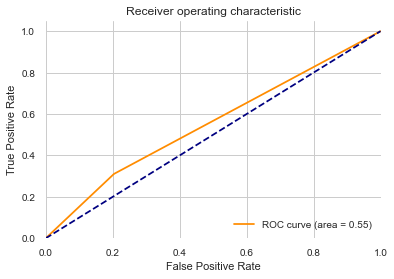

In [96]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predict_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Random Forest Classifier - Grid Search

In [97]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [3,5,7],
    'n_estimators': [10, 15]
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [98]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.0min finished
C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 5, 7], 'n_estimators': [10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [99]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 15}

In [100]:
best_grid = grid_search.best_estimator_

C:\Users\Dt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy Score: 78.664 
ROC Curve: 


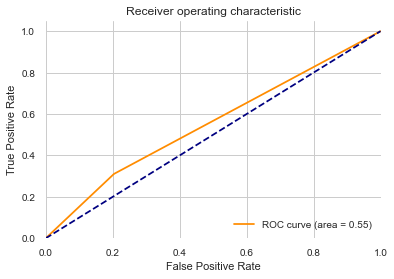

In [101]:
evaluate(best_grid,X_train,y_train, X_test, y_test)

## Naive Bayes

C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 78.505 


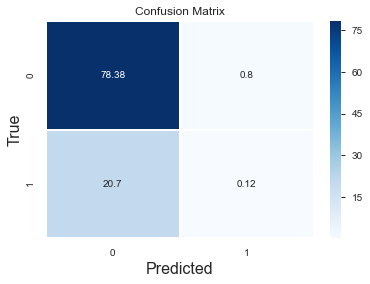

In [102]:
nb = GaussianNB()

nb.fit(X_train,y_train)

predict_test = nb.predict(X_test)

print ("Accuracy Score: %.3f " % (accuracy_score(y_test, predict_test)*100))

confusion = confusion_matrix(y_test, predict_test)
df_confusion = pd.DataFrame(100*confusion/float(confusion.sum()))
a = sns.heatmap(df_confusion.round(2), annot=True, cmap='Blues', fmt='g', linewidths=1)
a.set_title("Confusion Matrix")
a.set_xlabel('Predicted', fontsize=16)
a.set_ylabel('True', fontsize=16, rotation=90)
plt.show()

### *ROC Curve*

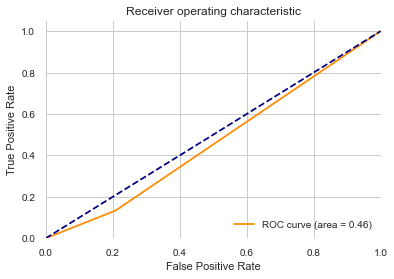

In [103]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predict_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting Classifier

C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 79.198 
Presion Score: 79.198


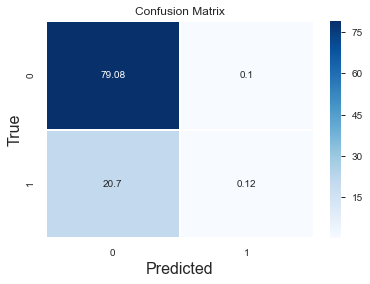

In [104]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train,y_train)

predict_test = gbc.predict(X_test)

print ("Accuracy Score: %.3f " % (accuracy_score(y_test, predict_test)*100))

confusion = confusion_matrix(y_test, predict_test)
df_confusion = pd.DataFrame(100*confusion/float(confusion.sum()))
a = sns.heatmap(df_confusion.round(2), annot=True, cmap='Blues', fmt='g', linewidths=1)
a.set_title("Confusion Matrix")
a.set_xlabel('Predicted', fontsize=16)
a.set_ylabel('True', fontsize=16, rotation=90)
plt.show()

### *ROC Curve*

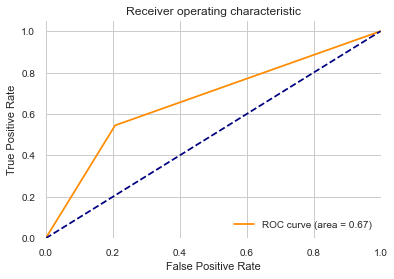

In [105]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predict_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting Classifier - Grid Search

In [106]:
# Create a based model
clf = GradientBoostingClassifier()
clf.get_params().keys()

dict_keys(['criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'presort', 'random_state', 'subsample', 'verbose', 'warm_start'])

In [107]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_split': [2,3,5],
    'loss' : ['deviance', 'exponential'],
    'max_features' : ['auto']
}

# Instantiate the grid search model
gs = GridSearchCV(GradientBoostingClassifier(), param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.4min finished
C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
gs.best_params_

{'loss': 'exponential', 'max_features': 'auto', 'min_samples_split': 2}

In [109]:
best_grid = gs.best_estimator_

C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 79.198 
ROC Curve: 


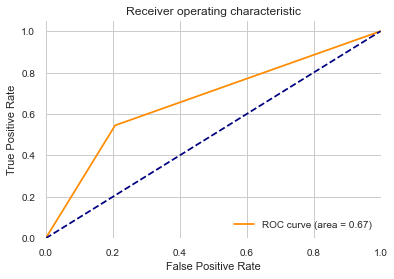

In [110]:
evaluate(best_grid,X_train,y_train, X_test, y_test)

## AdaBoost Classifier

C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 79.147 
Presion Score: 79.147


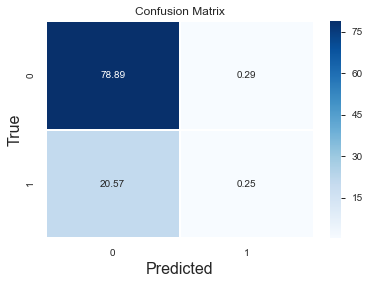

In [111]:
abc = AdaBoostClassifier()

abc.fit(X_train,y_train)

predict_test = abc.predict(X_test)

print ("Accuracy Score: %.3f " % (accuracy_score(y_test, predict_test)*100))

confusion = confusion_matrix(y_test, predict_test)
df_confusion = pd.DataFrame(100*confusion/float(confusion.sum()))
a = sns.heatmap(df_confusion.round(2), annot=True, cmap='Blues', fmt='g', linewidths=1)
a.set_title("Confusion Matrix")
a.set_xlabel('Predicted', fontsize=16)
a.set_ylabel('True', fontsize=16, rotation=90)
plt.show()

### *ROC Curve*

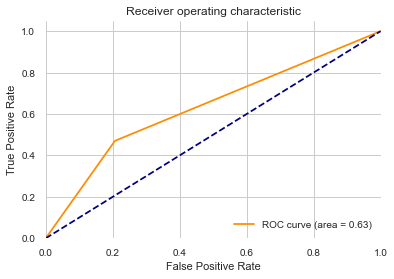

In [112]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predict_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## AdaBoost Classifier - Grid Search

In [113]:
# Create a based model
clf = AdaBoostClassifier()
clf.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [114]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'learning_rate' :   [1,2,3],
    'n_estimators': [10,20]
}

# Instantiate the grid search model
gs = GridSearchCV(AdaBoostClassifier(), param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   17.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   17.2s finished
C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
gs.best_params_

{'learning_rate': 1, 'n_estimators': 10}

In [116]:
best_grid = gs.best_estimator_

C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 79.159 
ROC Curve: 


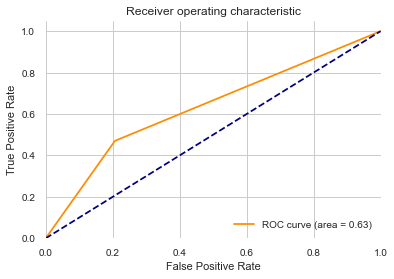

In [117]:
evaluate(best_grid,X_train,y_train, X_test, y_test)

## Cat Boost Classifier

Learning rate set to 0.098931
0:	learn: 0.6536399	test: 0.6536399	test1: 0.6536211	best: 0.6536211 (0)	total: 191ms	remaining: 3m 11s
100:	learn: 0.4800563	test: 0.4800563	test1: 0.4839596	best: 0.4839596 (100)	total: 7.24s	remaining: 1m 4s
200:	learn: 0.4725135	test: 0.4725135	test1: 0.4828817	best: 0.4828670 (187)	total: 14.3s	remaining: 56.9s
300:	learn: 0.4664202	test: 0.4664202	test1: 0.4828648	best: 0.4828198 (207)	total: 19.5s	remaining: 45.3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.482819827
bestIteration = 207

Shrink model to first 208 iterations.
Accuracy Score: 79.262 
Presion Score: 79.262


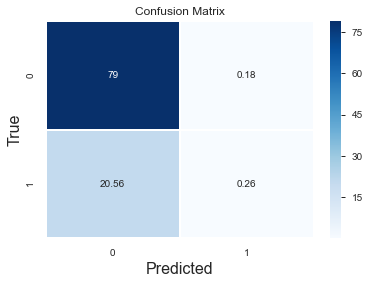

In [118]:
cbc=CatBoostClassifier()

cbc.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)

predict_test = cbc.predict(X_test)

print ("Accuracy Score: %.3f " % (accuracy_score(y_test, predict_test)*100))

confusion = confusion_matrix(y_test, predict_test)
df_confusion = pd.DataFrame(100*confusion/float(confusion.sum()))
a = sns.heatmap(df_confusion.round(2), annot=True, cmap='Blues', fmt='g', linewidths=1)
a.set_title("Confusion Matrix")
a.set_xlabel('Predicted', fontsize=16)
a.set_ylabel('True', fontsize=16, rotation=90)
plt.show()

### *ROC Curve*

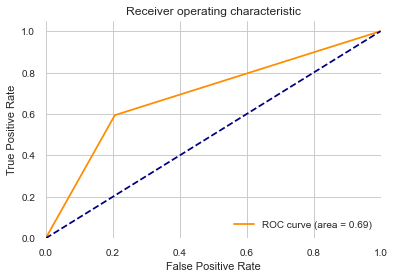

In [119]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predict_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## CatBoost Classifier - Grid Search

In [127]:
# Create a based model
clf = CatBoostClassifier()
clf.get_params().keys()

dict_keys([])

In [132]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'depth'         : [6,8],
    'learning_rate' : [0.05, 0.1],
    'iterations'    : [20,30]
}

# Instantiate the grid search model
gs = GridSearchCV(CatBoostClassifier(), param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   22.4s finished


0:	learn: 0.6758798	total: 36.2ms	remaining: 688ms
1:	learn: 0.6604925	total: 59.1ms	remaining: 532ms
2:	learn: 0.6463820	total: 84.3ms	remaining: 478ms
3:	learn: 0.6335221	total: 110ms	remaining: 441ms
4:	learn: 0.6218013	total: 136ms	remaining: 408ms
5:	learn: 0.6112535	total: 159ms	remaining: 371ms
6:	learn: 0.6015189	total: 183ms	remaining: 340ms
7:	learn: 0.5926979	total: 207ms	remaining: 310ms
8:	learn: 0.5844811	total: 235ms	remaining: 287ms
9:	learn: 0.5769385	total: 267ms	remaining: 267ms
10:	learn: 0.5702588	total: 290ms	remaining: 237ms
11:	learn: 0.5639872	total: 316ms	remaining: 211ms
12:	learn: 0.5581782	total: 344ms	remaining: 185ms
13:	learn: 0.5529613	total: 373ms	remaining: 160ms
14:	learn: 0.5482261	total: 402ms	remaining: 134ms
15:	learn: 0.5437698	total: 431ms	remaining: 108ms
16:	learn: 0.5395933	total: 464ms	remaining: 81.8ms
17:	learn: 0.5359317	total: 491ms	remaining: 54.6ms
18:	learn: 0.5324176	total: 521ms	remaining: 27.4ms
19:	learn: 0.5292001	total: 556ms	r

In [133]:
gs.best_params_

{'depth': 6, 'iterations': 20, 'learning_rate': 0.05}

In [134]:
best_grid = gs.best_estimator_

0:	learn: 0.6758798	total: 28.8ms	remaining: 548ms
1:	learn: 0.6604925	total: 52.1ms	remaining: 469ms
2:	learn: 0.6463820	total: 76.1ms	remaining: 431ms
3:	learn: 0.6335221	total: 101ms	remaining: 405ms
4:	learn: 0.6218013	total: 133ms	remaining: 400ms
5:	learn: 0.6112535	total: 161ms	remaining: 376ms
6:	learn: 0.6015189	total: 191ms	remaining: 354ms
7:	learn: 0.5926979	total: 219ms	remaining: 328ms
8:	learn: 0.5844811	total: 257ms	remaining: 315ms
9:	learn: 0.5769385	total: 290ms	remaining: 290ms
10:	learn: 0.5702588	total: 312ms	remaining: 255ms
11:	learn: 0.5639872	total: 346ms	remaining: 231ms
12:	learn: 0.5581782	total: 375ms	remaining: 202ms
13:	learn: 0.5529613	total: 399ms	remaining: 171ms
14:	learn: 0.5482261	total: 422ms	remaining: 141ms
15:	learn: 0.5437698	total: 451ms	remaining: 113ms
16:	learn: 0.5395933	total: 495ms	remaining: 87.4ms
17:	learn: 0.5359317	total: 534ms	remaining: 59.3ms
18:	learn: 0.5324176	total: 579ms	remaining: 30.5ms
19:	learn: 0.5292001	total: 612ms	r

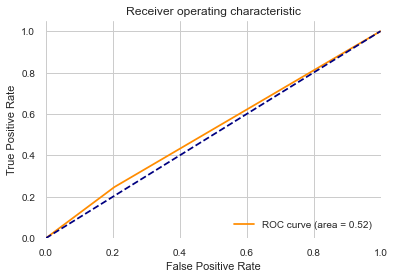

In [135]:
evaluate(best_grid,X_train,y_train, X_test, y_test)

## XG Boost Classifier

C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.20801	validation_1-error:0.208215
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[99]	validation_0-error:0.207592	validation_1-error:0.207976


C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy Score: 79.202 


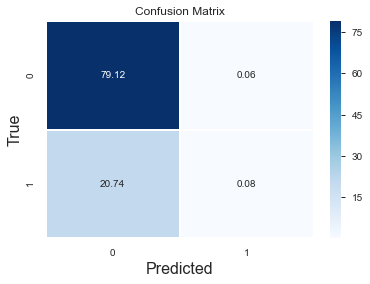

In [162]:
xg=XGBClassifier()

xg.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)

predict_test = xg.predict(X_test)

print ("Accuracy Score: %.3f " % (accuracy_score(y_test, predict_test)*100))

confusion = confusion_matrix(y_test, predict_test)
df_confusion = pd.DataFrame(100*confusion/float(confusion.sum()))
a = sns.heatmap(df_confusion.round(2), annot=True, cmap='Blues', fmt='g', linewidths=1)
a.set_title("Confusion Matrix")
a.set_xlabel('Predicted', fontsize=16)
a.set_ylabel('True', fontsize=16, rotation=90)
plt.show()

### *ROC Curve*

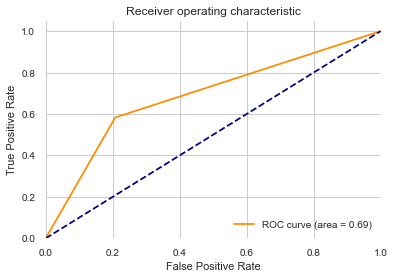

In [163]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predict_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## XG Boost Classifier - Grid Search

In [127]:
# Create a based model
clf = XGBClassifier()
clf.get_params().keys()

dict_keys([])

In [165]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'booster'         : ['gbtree', 'gblinear' , 'dart'],
    'eta'    : [0.2,0.4,0.6],
    'max_depth' : [5,6,7]
}

# Instantiate the grid search model
gs = GridSearchCV(XGBClassifier(), param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 21.7min finished
C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [166]:
gs.best_params_

{'booster': 'gbtree', 'eta': 0.2, 'max_depth': 5, 'nthread': 5}

In [167]:
best_grid = gs.best_estimator_

C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dt\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy Score: 79.270 
ROC Curve: 


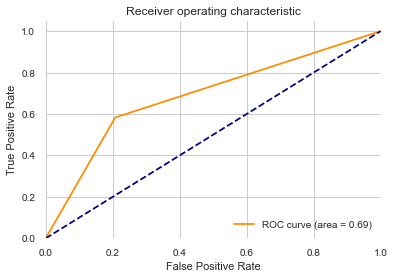

In [168]:
evaluate(best_grid,X_train,y_train, X_test, y_test)

## RESULTS

In [6]:
result_df = pd.DataFrame({
    'Models':['Knn','Logistic','LDA','DecisionTree','RandomForest','NaiveBayes','GradiantBoosting','AdaBoost','CatBoost','XGB'],
    'Accuracy':[79.06,79.18,79.18,70.25,78.66,78.50,79.2,79.16,79.26,79.27],
    'AUC' : [0.52, 0.5, 0.57, 0.53, 0.55, 0.46, 0.67, 0.63, 0.69, 0.69]
})

In [7]:
result_df

,Models,Accuracy,AUC
0,Knn,79.06,0.52
1,Logistic,79.18,0.50
2,LDA,79.18,0.57
3,DecisionTree,70.25,0.53
4,RandomForest,78.66,0.55
5,NaiveBayes,78.50,0.46
6,GradiantBoosting,79.20,0.67
7,AdaBoost,79.16,0.63
8,CatBoost,79.26,0.69
9,XGB,79.27,0.69


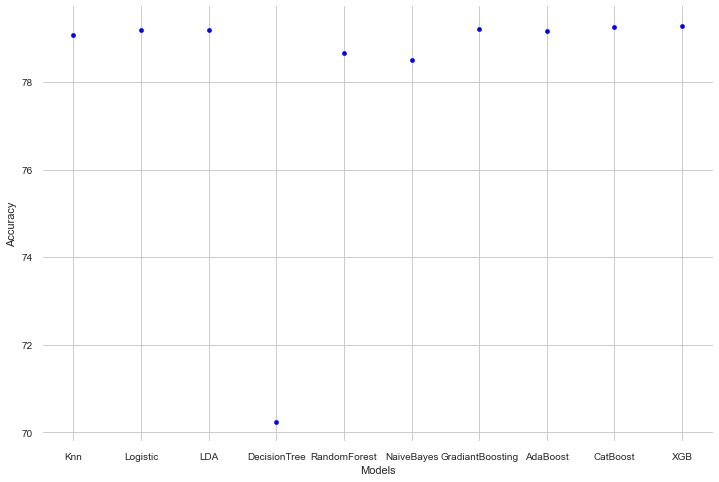

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

result_df.plot(kind='scatter',x='Models',y='Accuracy',color='blue',figsize=(12, 8))
plt.show()

## CONCLUSION

Thus, by analyzing all the models for our dataset and using grid search to get the best parameters we have accuracies and roc curve for all the models. By comparing thye accuracies and taking roc values in to account and taking H2o in to account, we would like to choose **XGBoost** as the best model that better fits for our dataset with an *accuracy* of **79.27** and *auc value* of **0.7** 